In [1]:
import pickle

from matplotlib import pyplot as plt
from notebook_utils.map_to_roget import make_clean_model_df, RogetMapper
from tqdm.notebook import tqdm_notebook as tqdm

from notebook_utils.constants import PROJ_ROOT, NEW_GENRES
from notebook_utils.feature_reduction import FeatureReducer
from notebook_utils.predictions import Predictor
from notebook_utils.roget_themes import get_themes_by_genre, get_rosect_freq, plot_theme_freq_diff, \
    plot_avg_freq_diff_by_genre
from notebook_utils.utils import create_cmap

tqdm.pandas()

fr = FeatureReducer(general=True)
p = Predictor(loader=fr.loader)
rm = RogetMapper(p)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Show Loaded Data

In [2]:
fr.loader.show_model_df("WordNet")

Book #,@Genre,be,exist,equal,...,agua,ditch_reed,tax-exempt,marmorean,@Outcome
10368,Adventure_Stories,0.52065,0.540626,0.516462,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.38635,0.385256,0.382785,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.33830,0.340071,0.336771,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.25300,0.251685,0.250298,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.29720,0.296869,0.295518,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.11935,0.124455,0.119000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.23260,0.234641,0.232051,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.00525,0.005549,0.005157,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.21695,0.219580,0.214994,...,1.0,1.0,0.0,0.0,SUCCESSFUL


# Train and Reduce Models

### WordNet

In [15]:
wordnet_acc, wordnet_weights = p.predict_genre(fr.loader.wordnet_df_scaled, "WordNet", how="one_v_all", genre_list=NEW_GENRES, disp_weights=False)

Genre,Accuracy
Adventure_Stories,0.737517
Fiction,0.675000
Historical_Fiction,0.810000
Love_Stories,0.783077
Mystery,0.815000
Poetry,0.918462
Science_Fiction,0.965000
Short_Stories,0.675000
Average,0.797382


In [16]:
wn_exh, wn_rw = fr.reduce_features(wordnet_weights, "WordNet", g_predict="one_v_all", og_acc=wordnet_acc)

Adventure_Stories exhausted at 9.75 deviations above the mean
Fiction exhausted at 9.5 deviations above the mean
Historical_Fiction exhausted at 11.25 deviations above the mean
Love_Stories exhausted at 10.25 deviations above the mean
Mystery exhausted at 10.0 deviations above the mean
Poetry exhausted at 12.0 deviations above the mean
Science_Fiction exhausted at 15.0 deviations above the mean
Short_Stories exhausted at 14.75 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,1.75000,0.876383,2422.0
Fiction,4.25000,0.855000,134.0
Historical_Fiction,2.00000,0.910000,1762.0
Love_Stories,2.25000,0.914231,1275.0
Mystery,1.25000,0.965000,4327.0
Poetry,2.25000,0.964231,1489.0
Science_Fiction,1.75000,0.990000,1913.0
Short_Stories,2.25000,0.815000,1006.0
Average,2.21875,0.911231,1791.0


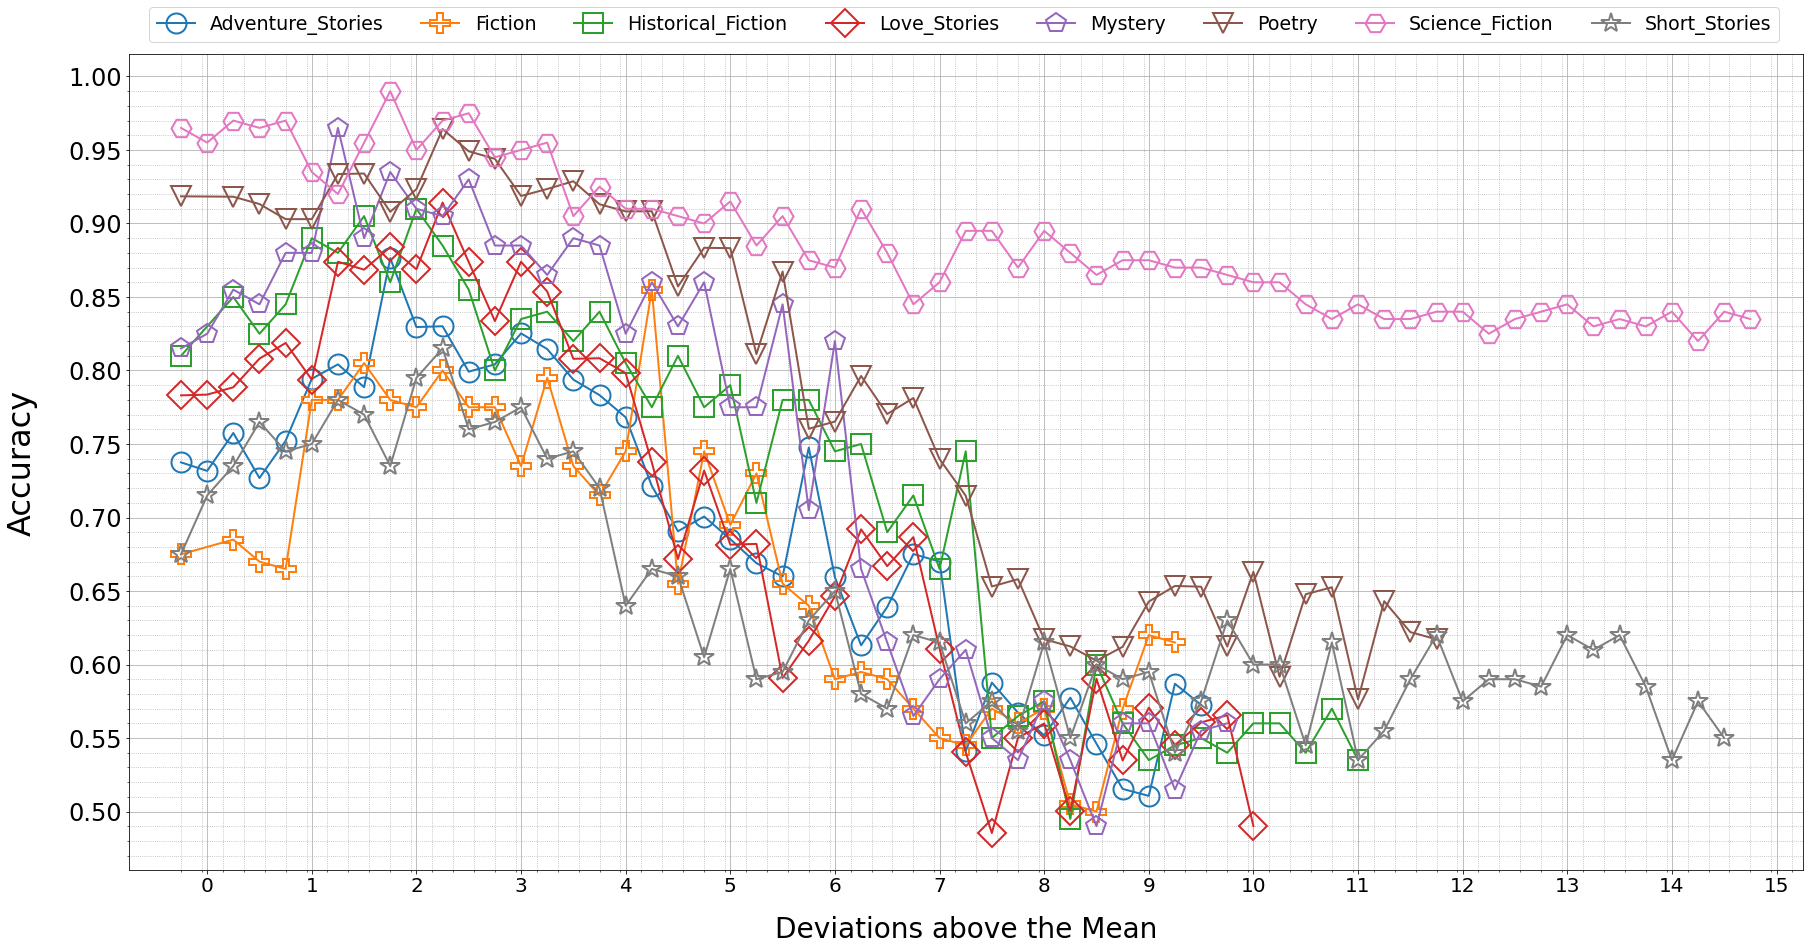

In [17]:
wn_reduced_acc = fr.reduce_features(wn_exh, markersize=20)

# Mapping to Roget Sections

## Mapping WordNet (Not Reduced)

In [18]:
wn_df = make_clean_model_df(fr.loader.wordnet_data)

In [19]:
wn_set = {genre: wn_df[wn_df["@Genre"] == genre] for genre in NEW_GENRES}

In [20]:
NumsAndOutcomes = {genre: wn_df[wn_df["@Genre"] == genre][["Book #", "@Genre", "@Outcome"]].reset_index(drop=True) for genre in NEW_GENRES}

In [21]:
wn_to_rocat = pickle.load(open(str(PROJ_ROOT.joinpath("data", "wn_to_rocat.txt")), "rb+"))

In [22]:
wn_to_rocat_no_scale, wn_to_rocat_scaled = rm.concat_map_to_roget(wn_to_rocat, "WordNet", "Category", NumsAndOutcomes)

In [23]:
wn_rosect_no_scale, wn_rosect_scaled = rm.map_to_roget(wn_to_rocat_no_scale, "WordNet", NumsAndOutcomes, to_sections=True)

### Test and Reduce Genre Prediction for WordNet to Roget Sections

In [24]:
full_wn_rosect_acc, full_wn_rosect_weights, wn_rosect_acc, wn_rosect_weights = rm.map_to_roget(wn_rosect_no_scale, wn_rosect_scaled,
                                                                                               src_model="WordNet", map_to="Section",
                                                                                               g_predict="one_v_all")

Genre,Accuracy
Adventure_Stories,0.613090
Fiction,0.560000
Historical_Fiction,0.730000
Love_Stories,0.610769
Mystery,0.705000
Poetry,0.851795
Science_Fiction,0.935000
Short_Stories,0.645000
Average,0.706332


Genre,Accuracy
Adventure_Stories,0.912281
Fiction,0.900000
Historical_Fiction,0.910000
Love_Stories,0.969872
Mystery,0.980000
Poetry,0.923462
Science_Fiction,0.920000
Short_Stories,0.820000
Average,0.916952


In [25]:
wn_rosect_df = rm.map_to_roget(wn_rosect_no_scale)
wn_rosect_exh, wn_rosect_rw = fr.reduce_features(full_wn_rosect_weights, "WordNet to Roget Section", model_df=wn_rosect_df,
                                                 g_predict="one_v_all", og_acc=full_wn_rosect_acc)

Adventure_Stories exhausted at 1.75 deviations above the mean
Fiction exhausted at 1.5 deviations above the mean
Historical_Fiction exhausted at 1.5 deviations above the mean
Love_Stories exhausted at 1.5 deviations above the mean
Mystery exhausted at 1.5 deviations above the mean
Poetry exhausted at 1.25 deviations above the mean
Science_Fiction exhausted at 0.75 deviations above the mean
Short_Stories exhausted at 1.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,0.75000,0.711336,13.0
Fiction,0.25000,0.600000,21.0
Historical_Fiction,0.25000,0.745000,22.0
Love_Stories,1.00000,0.656410,10.0
Mystery,0.25000,0.730000,17.0
Poetry,1.00000,0.862436,8.0
Science_Fiction,0.25000,0.950000,8.0
Short_Stories,0.00000,0.700000,21.0
Average,0.46875,0.744398,15.0


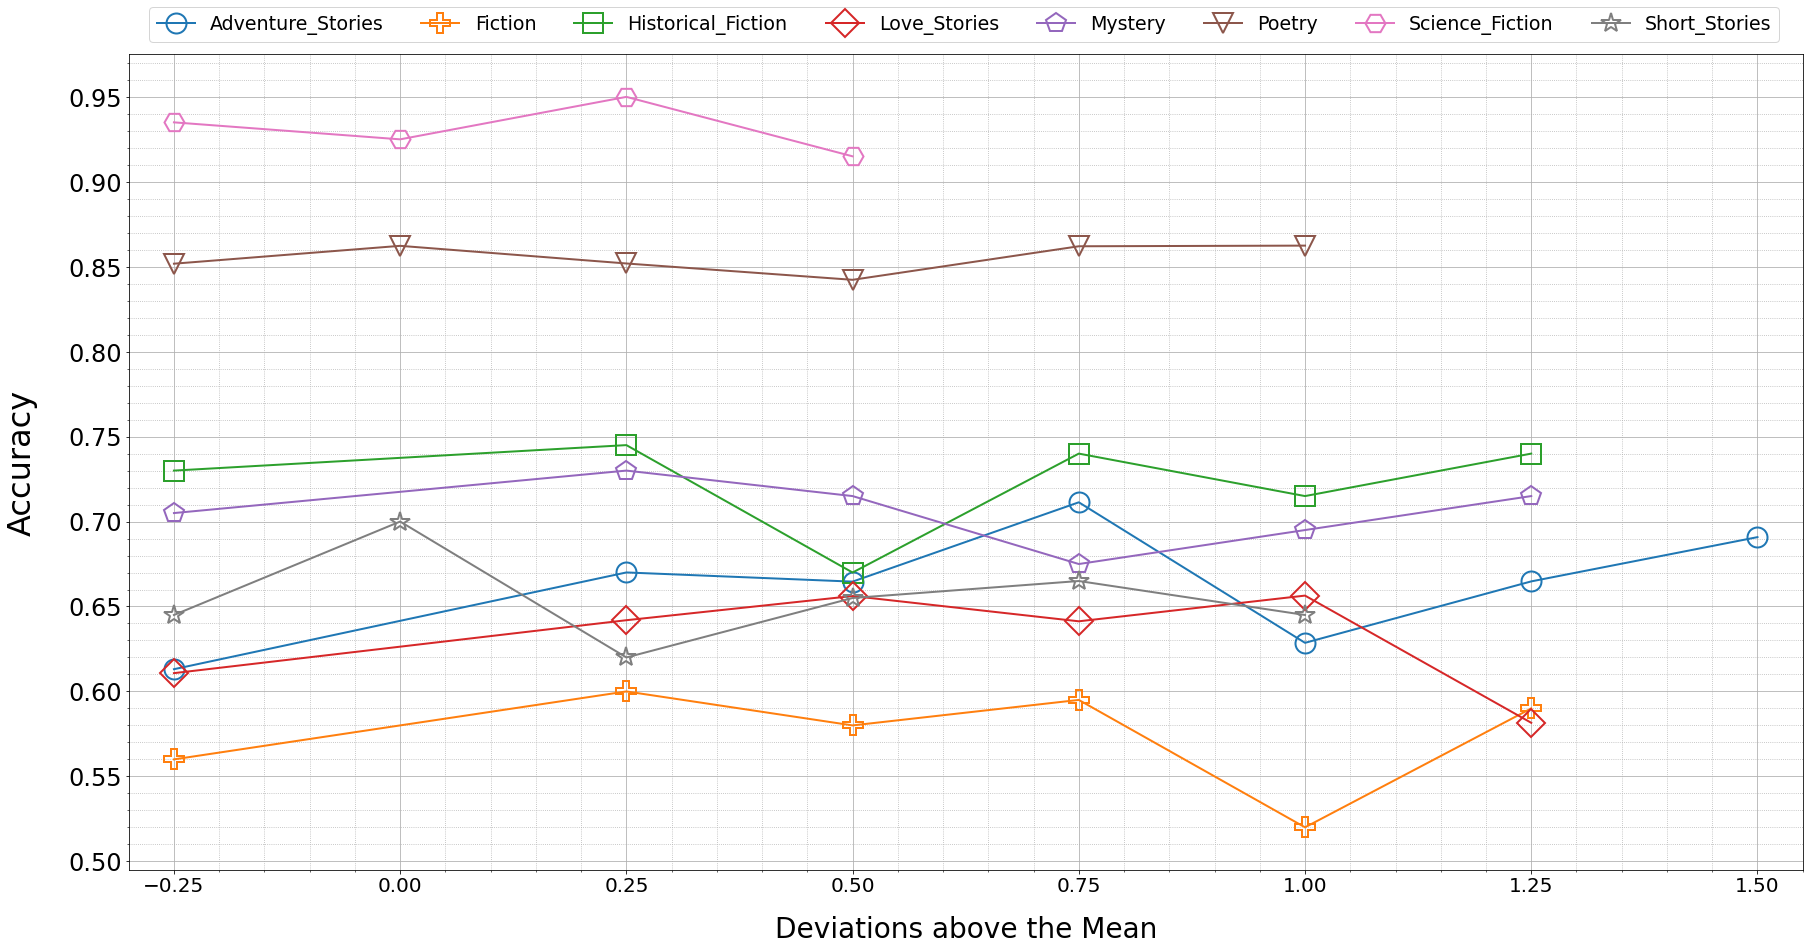

In [26]:
wn_rosect_reduced_acc = fr.reduce_features(wn_rosect_exh, markersize=20)

## Mapping WordNet (Reduced)

In [27]:
wnrf_set = {genre: wn_df[wn_df["@Genre"] == genre][["Book #", "@Genre"] + [w for w in wn_rw[genre]["Feature"]] + ["@Outcome"]] for genre in NEW_GENRES}

In [28]:
wnrf_to_rocat_no_scale, wnrf_to_rocat_scaled = rm.map_to_roget(wnrf_set, "WordNet", NumsAndOutcomes, to_categories=True)

In [29]:
wnrf_rosect_no_scale, wnrf_rosect_scaled = rm.map_to_roget(wnrf_to_rocat_no_scale, "WordNet", NumsAndOutcomes, to_sections=True)

### Test and Reduce Genre Prediction for WordNet to Roget Sections

In [30]:
full_wnrf_rosect_acc, full_wnrf_rosect_weights, wnrf_rosect_acc, wnrf_rosect_weights = rm.map_to_roget(wnrf_rosect_no_scale, wnrf_rosect_scaled,
                                                                                                       src_model="WordNet", map_to="Section",
                                                                                                       g_predict="one_v_all")

Genre,Accuracy
Adventure_Stories,0.994872
Fiction,0.945000
Historical_Fiction,0.990000
Love_Stories,0.990000
Mystery,0.995000
Poetry,0.948974
Science_Fiction,0.880000
Short_Stories,0.920000
Average,0.957981


Genre,Accuracy
Adventure_Stories,0.886640
Fiction,0.930000
Historical_Fiction,0.920000
Love_Stories,0.929487
Mystery,0.950000
Poetry,0.862179
Science_Fiction,0.910000
Short_Stories,0.870000
Average,0.907288


In [31]:
wnrf_rosect_df = rm.map_to_roget(wnrf_rosect_no_scale)
wnrf_rosect_exh, wnrf_rosect_rw = fr.reduce_features(full_wnrf_rosect_weights, "WordNet to Roget Section", model_df=wnrf_rosect_df,
                                                     g_predict="one_v_all", og_acc=full_wnrf_rosect_acc)

Adventure_Stories exhausted at 1.25 deviations above the mean
Fiction exhausted at 1.0 deviations above the mean
Historical_Fiction exhausted at 1.5 deviations above the mean
Love_Stories exhausted at 1.25 deviations above the mean
Mystery exhausted at 1.5 deviations above the mean
Poetry exhausted at 1.5 deviations above the mean
Science_Fiction exhausted at 1.0 deviations above the mean
Short_Stories exhausted at 0.75 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,-0.25000,0.994872,23.000
Fiction,0.00000,0.975000,13.000
Historical_Fiction,-0.25000,0.990000,23.000
Love_Stories,0.75000,1.000000,7.000
Mystery,-0.25000,0.995000,23.000
Poetry,0.50000,0.964231,15.000
Science_Fiction,0.75000,0.885000,8.000
Short_Stories,0.00000,0.950000,19.000
Average,0.15625,0.969263,16.375


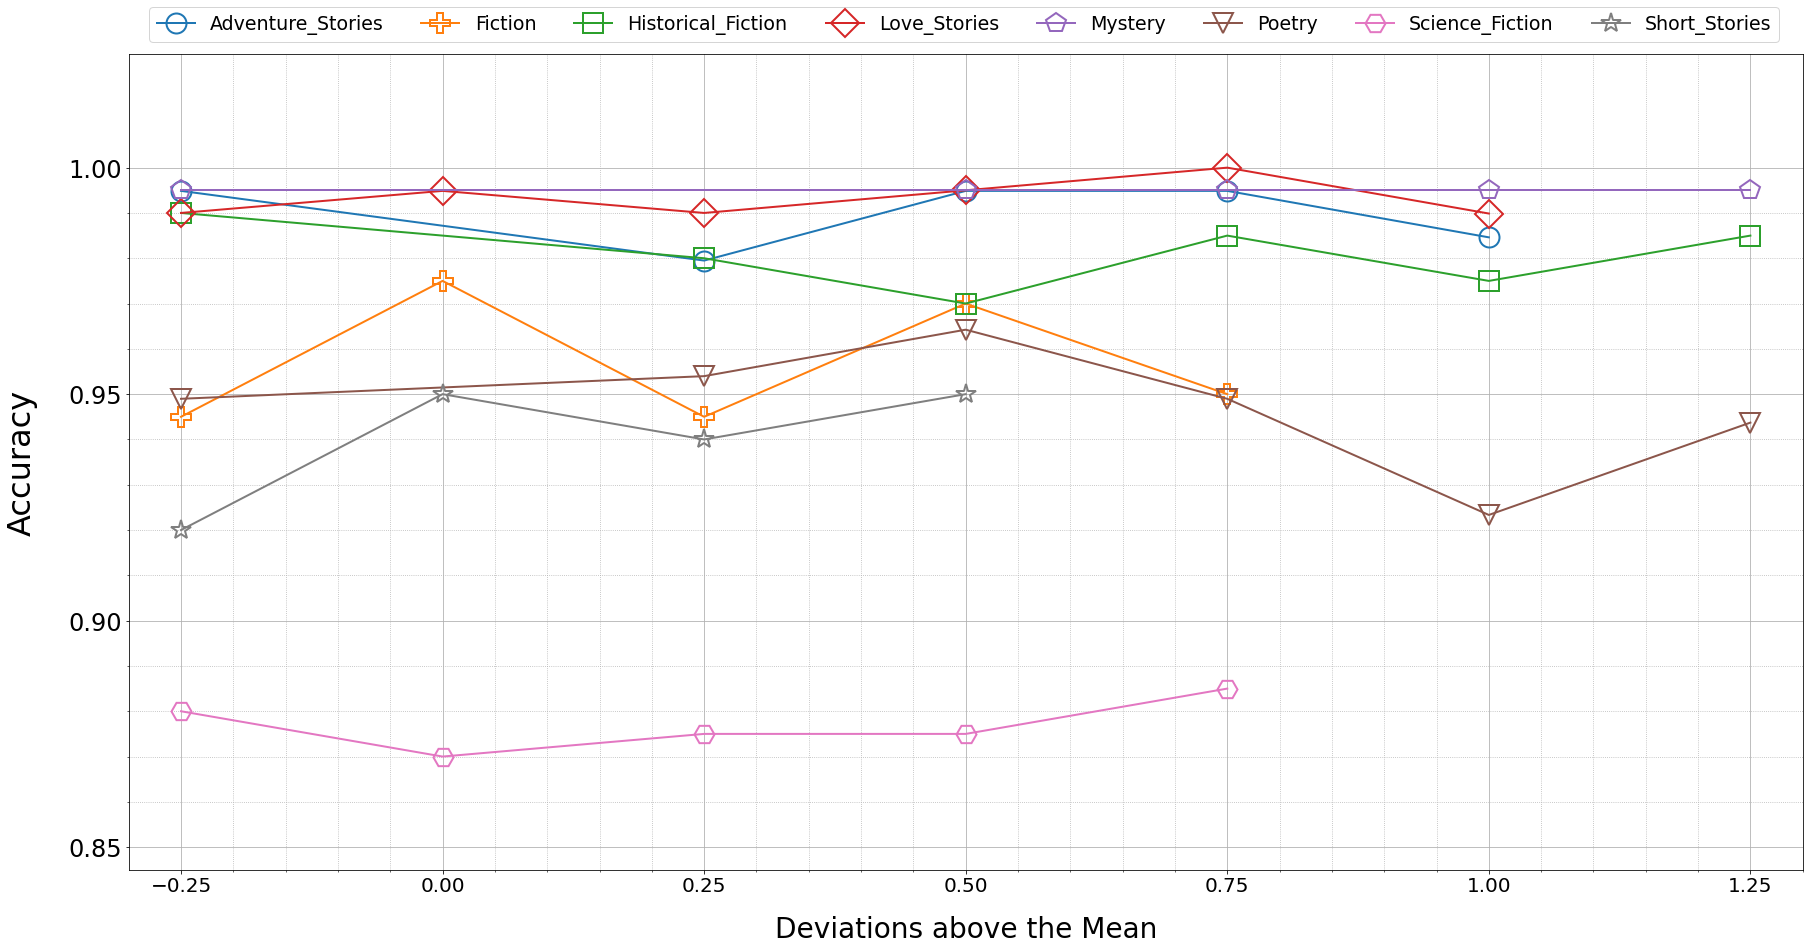

In [32]:
wnrf_rosect_reduced_acc = fr.reduce_features(wnrf_rosect_exh, markersize=20)

# Explore Themes

## WordNet to Roget (Not Reduced)

In [33]:
wn_rosect_set = {genre: wn_rosect_df[wn_rosect_df["@Genre"] == genre][["Book #", "@Genre"] + [w for w in wn_rosect_rw[genre]["Feature"]] + ["@Outcome"]] for genre in NEW_GENRES}

In [34]:
wn_rosect_themes_by_genre_df, wn_rosect_tbg_themes = get_themes_by_genre(wn_rosect_set, wn_rosect_rw)

In [35]:
wn_rosect_wvg_colors = create_cmap(plt.cm.nipy_spectral, wn_rosect_tbg_themes)

In [36]:
wn_rosect_wvg = get_rosect_freq(wn_rosect_set, wn_rosect_tbg_themes, wn_rosect_rw, g_predict="one_v_all")

## WordNet to Roget (Reduced)

In [37]:
wnrf_rosect_set = {genre: wnrf_rosect_df[wnrf_rosect_df["@Genre"] == genre][["Book #", "@Genre"] + [w for w in wnrf_rosect_rw[genre]["Feature"]] + ["@Outcome"]] for genre in NEW_GENRES}

In [38]:
wnrf_themes_by_genre_df, wnrf_tbg_themes = get_themes_by_genre(wnrf_rosect_set, wnrf_rosect_rw)

In [39]:
wnrf_rosect_wvg = get_rosect_freq(wnrf_rosect_set, wnrf_tbg_themes, wnrf_rosect_rw, g_predict="one_v_all")

# Plot Frequency Differences

## Theme Frequency Difference per Genre

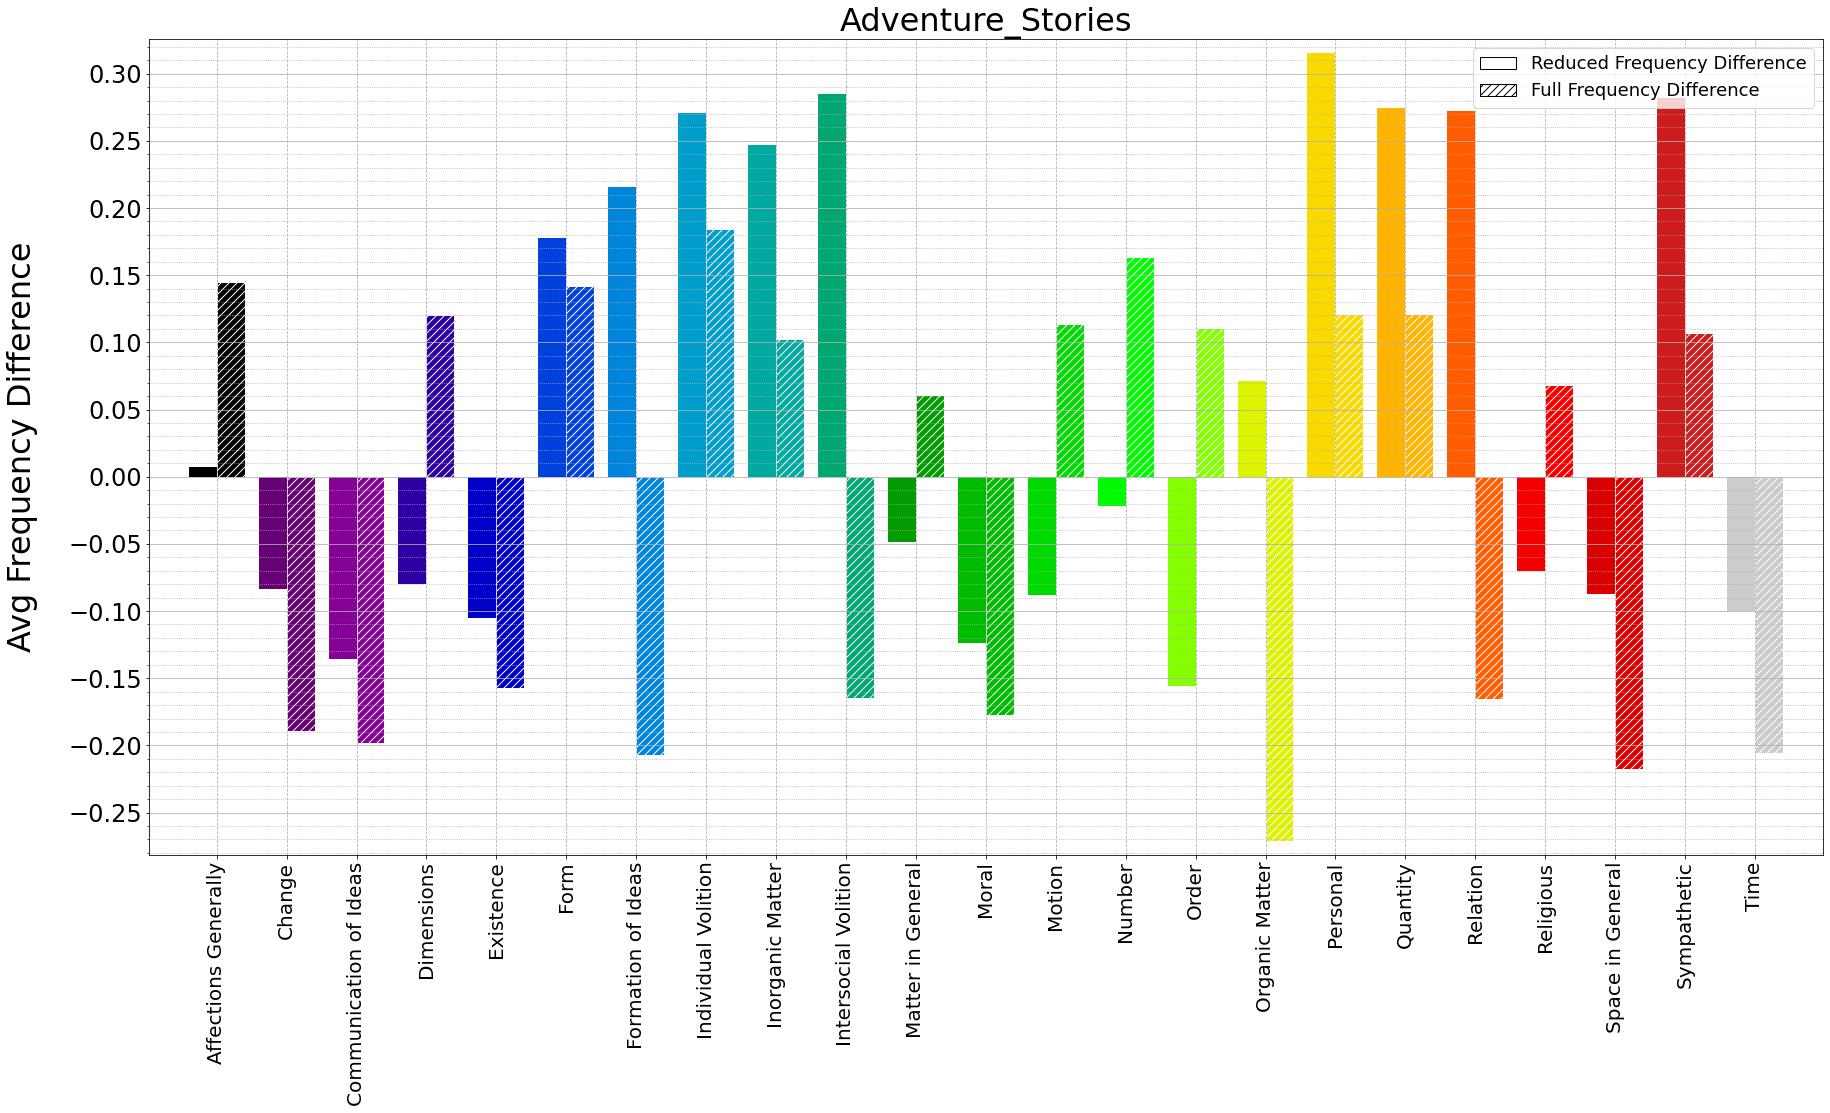

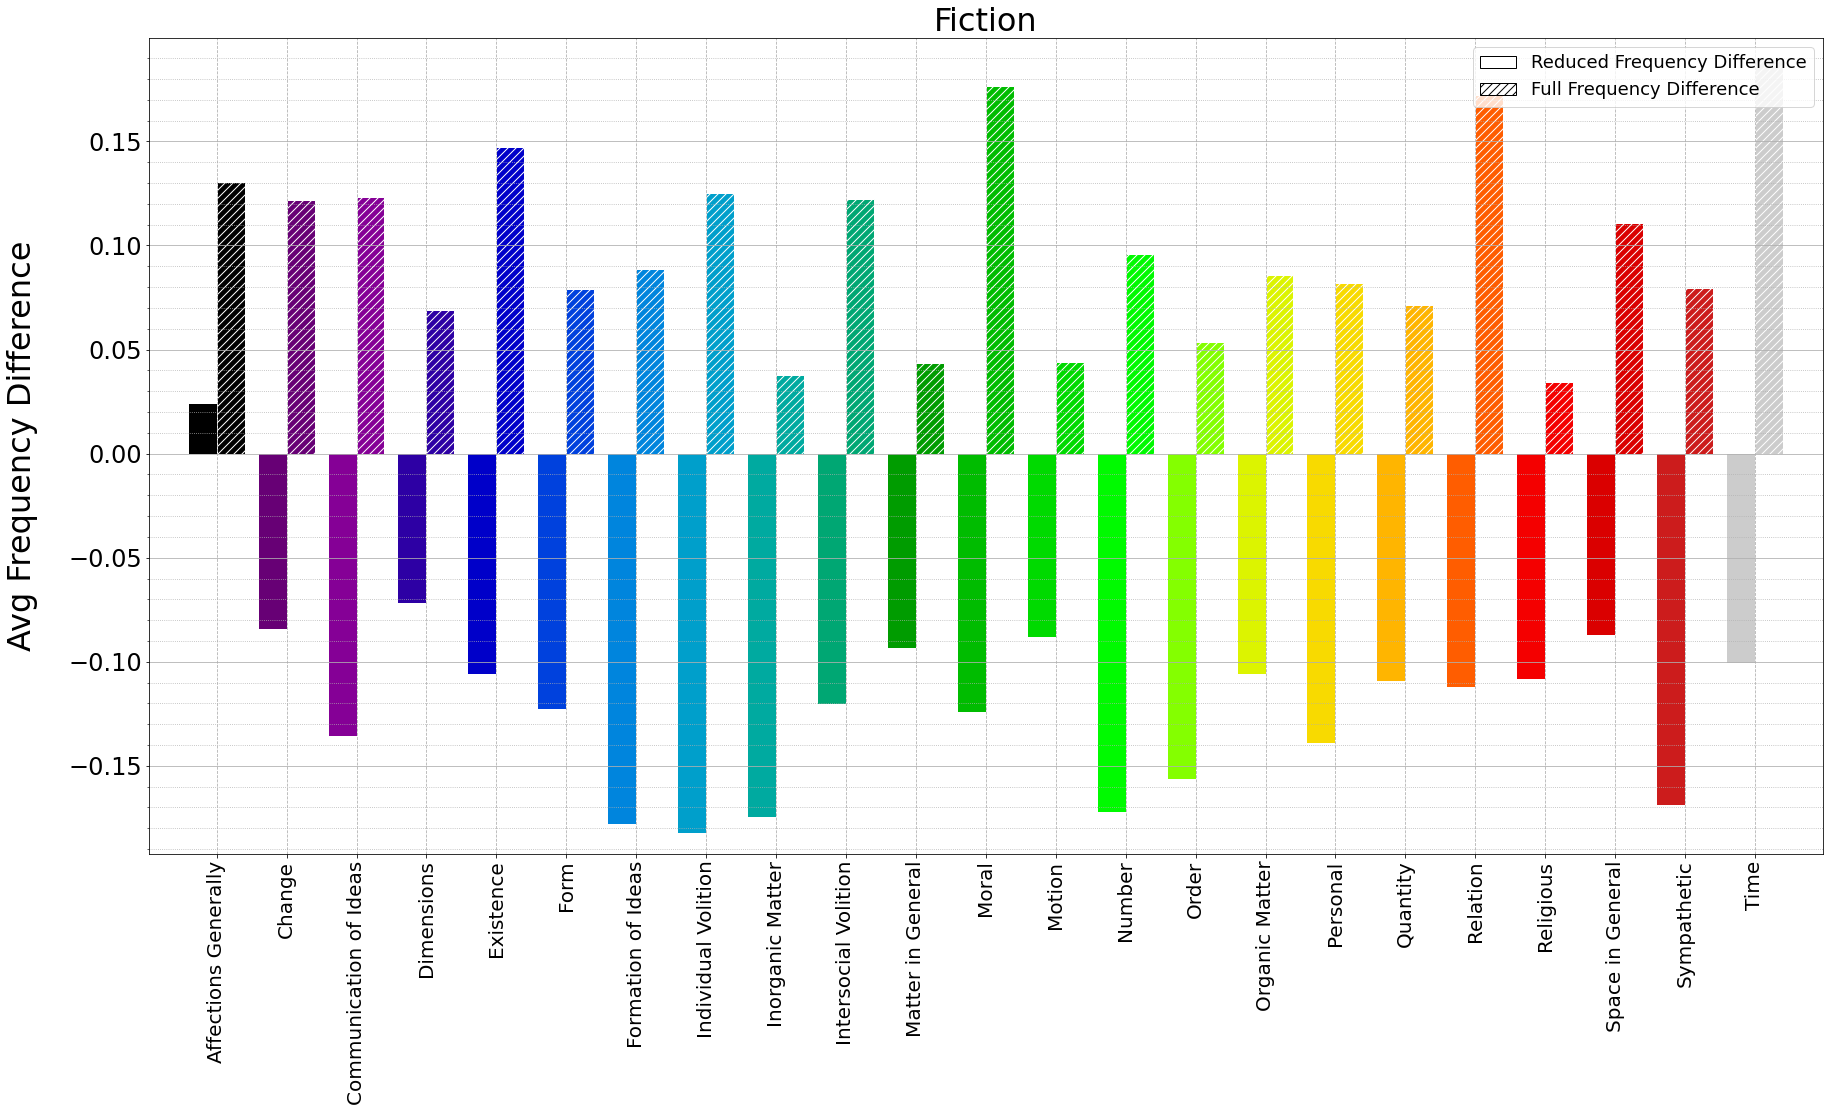

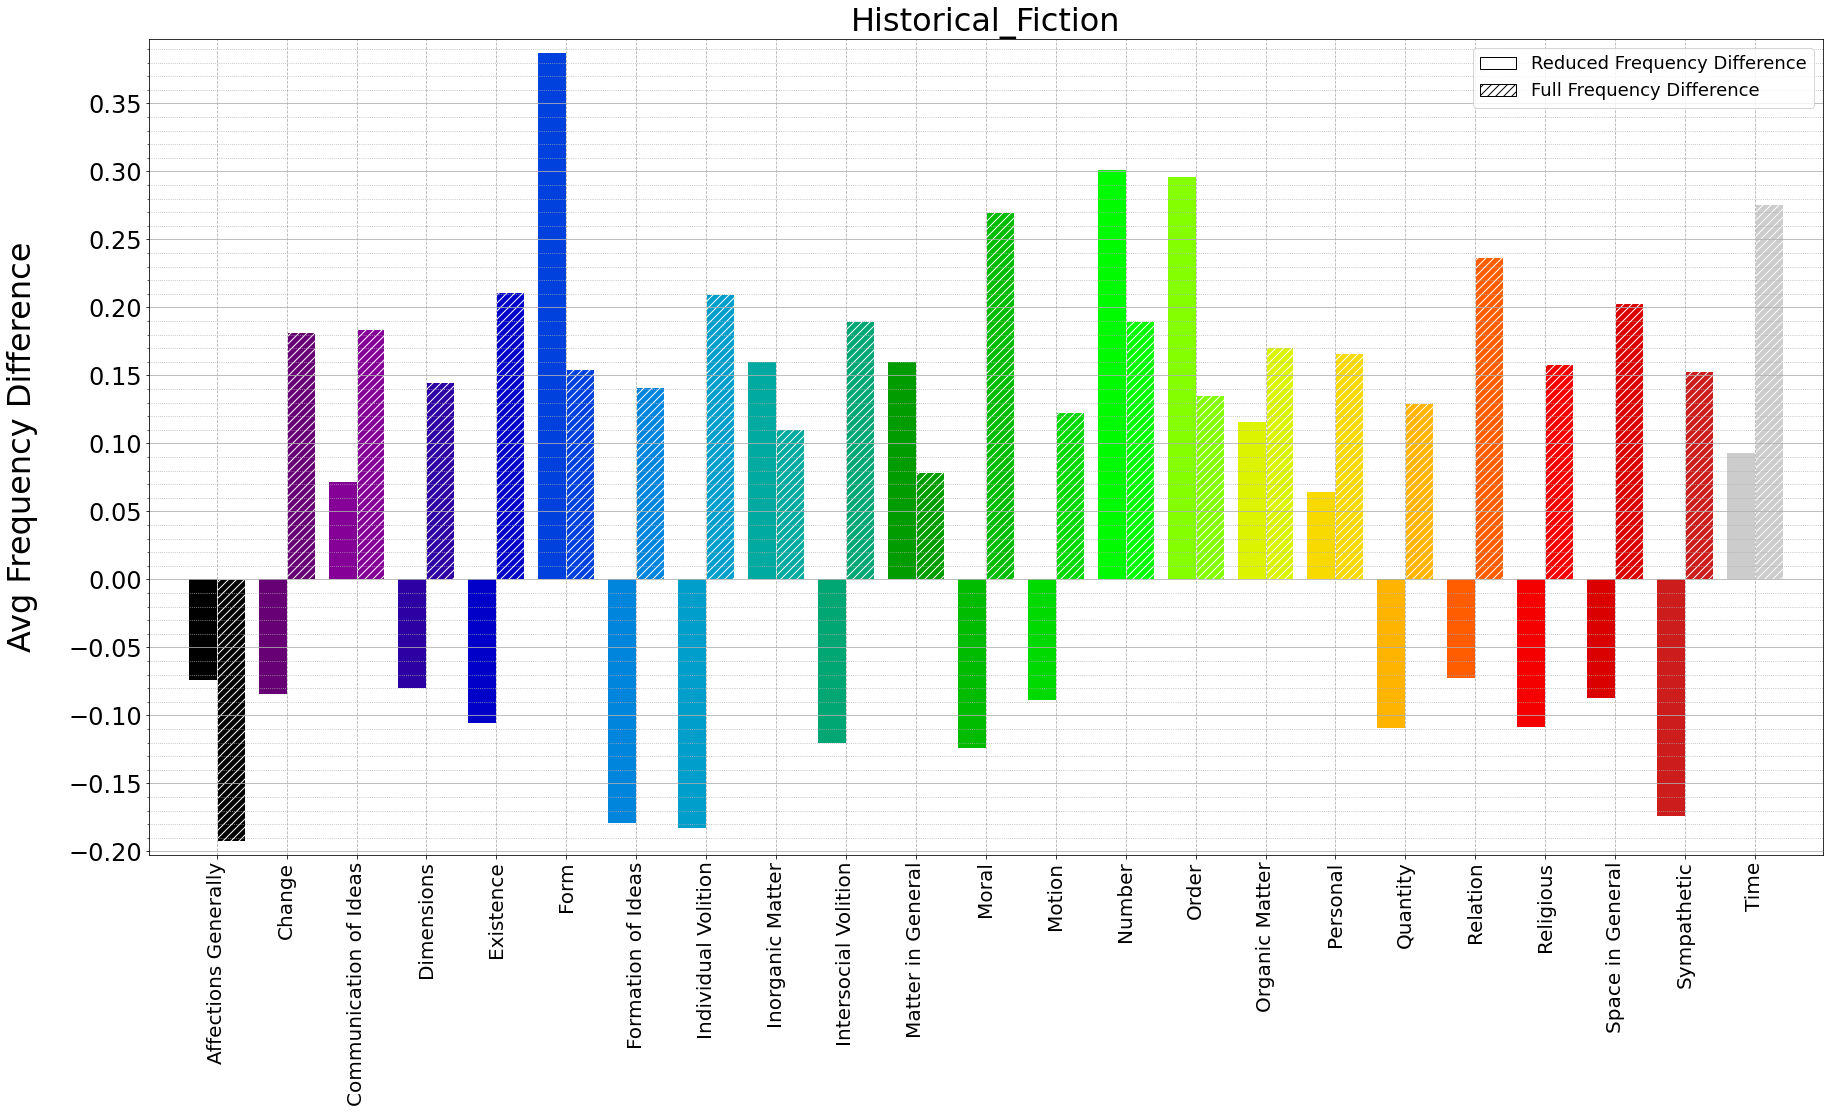

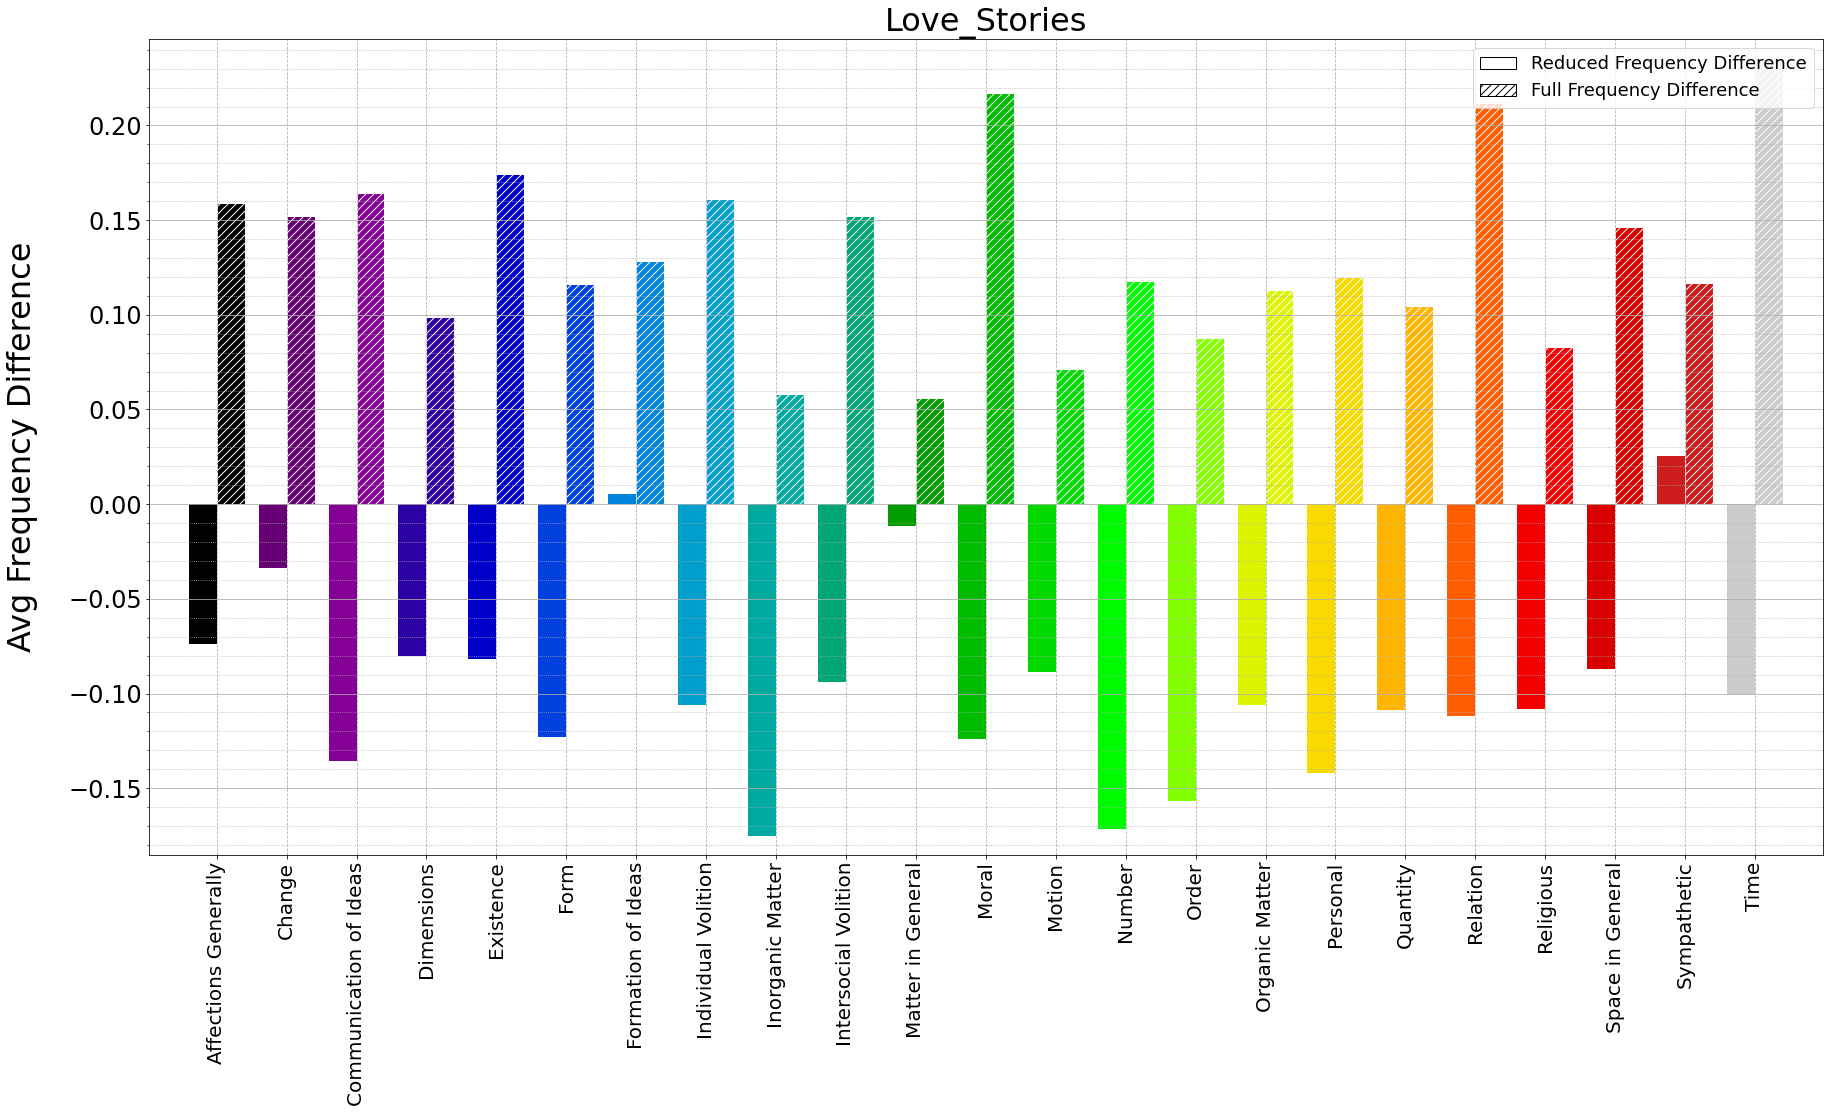

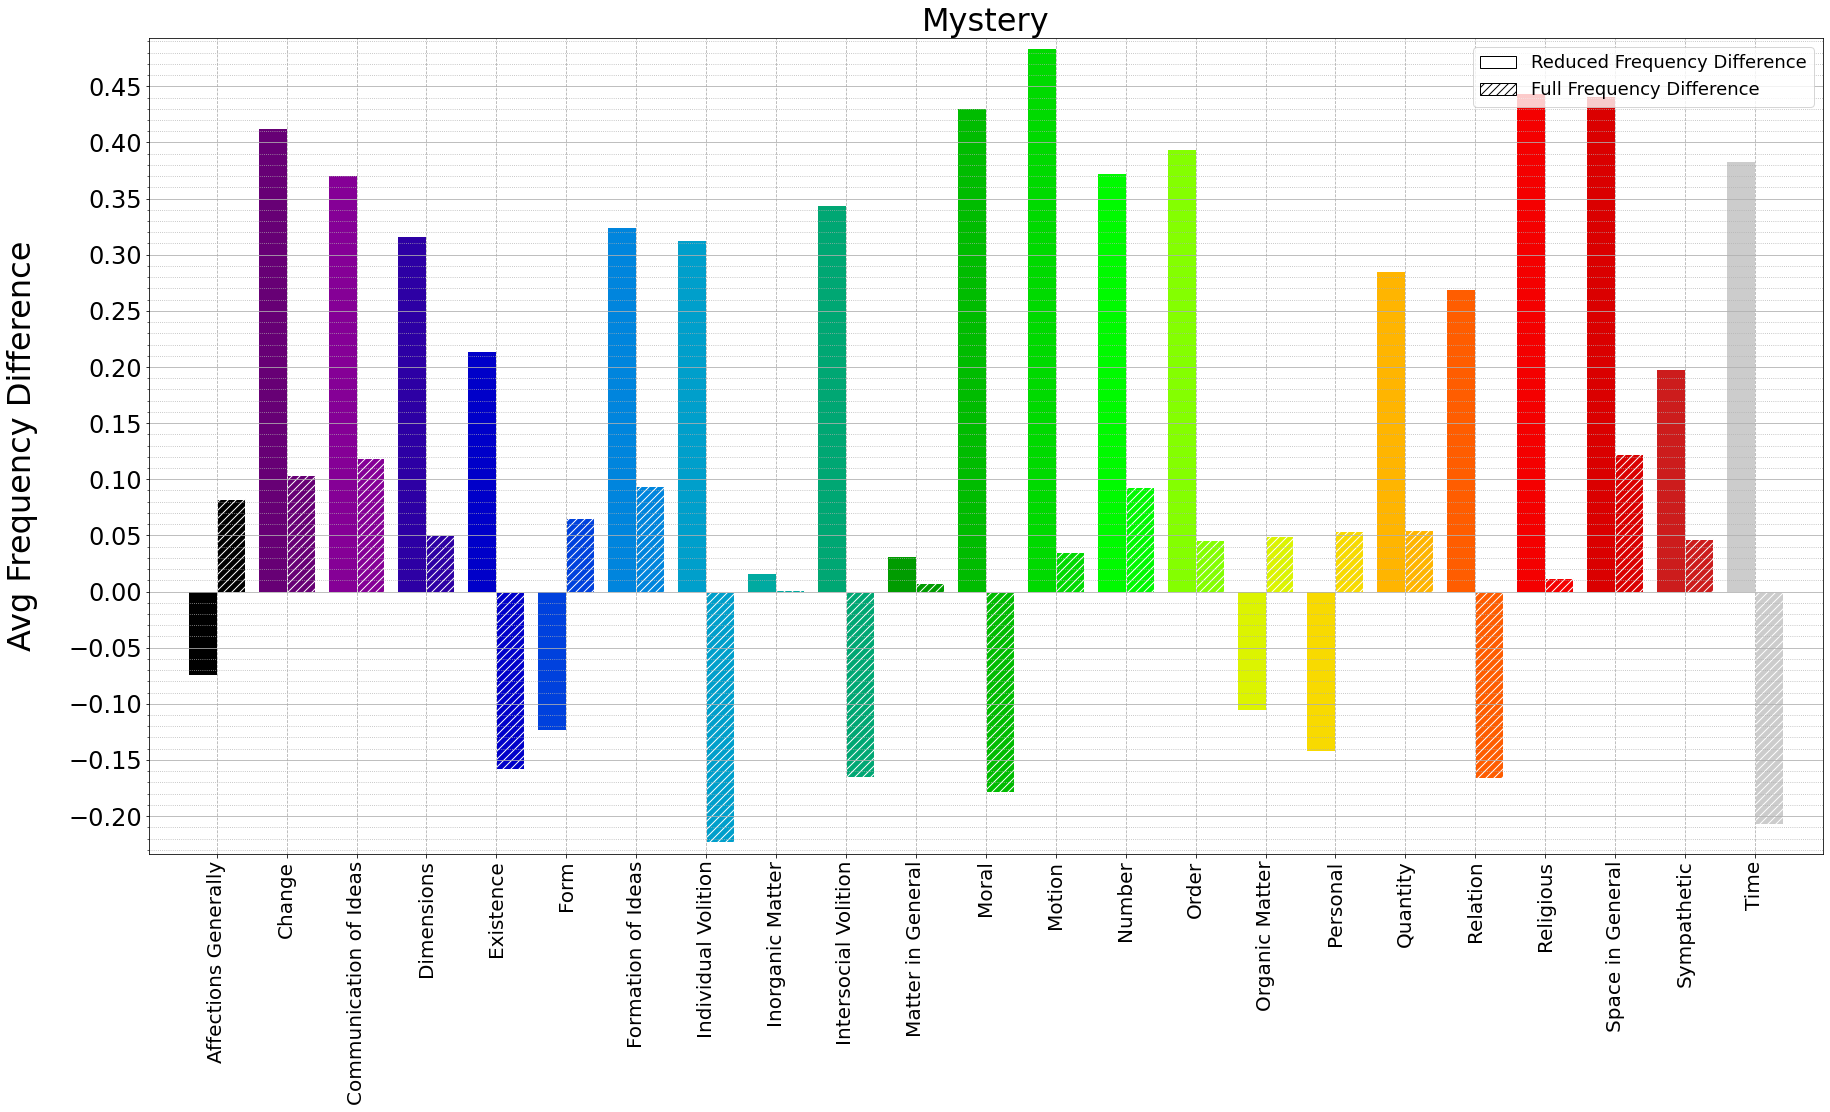

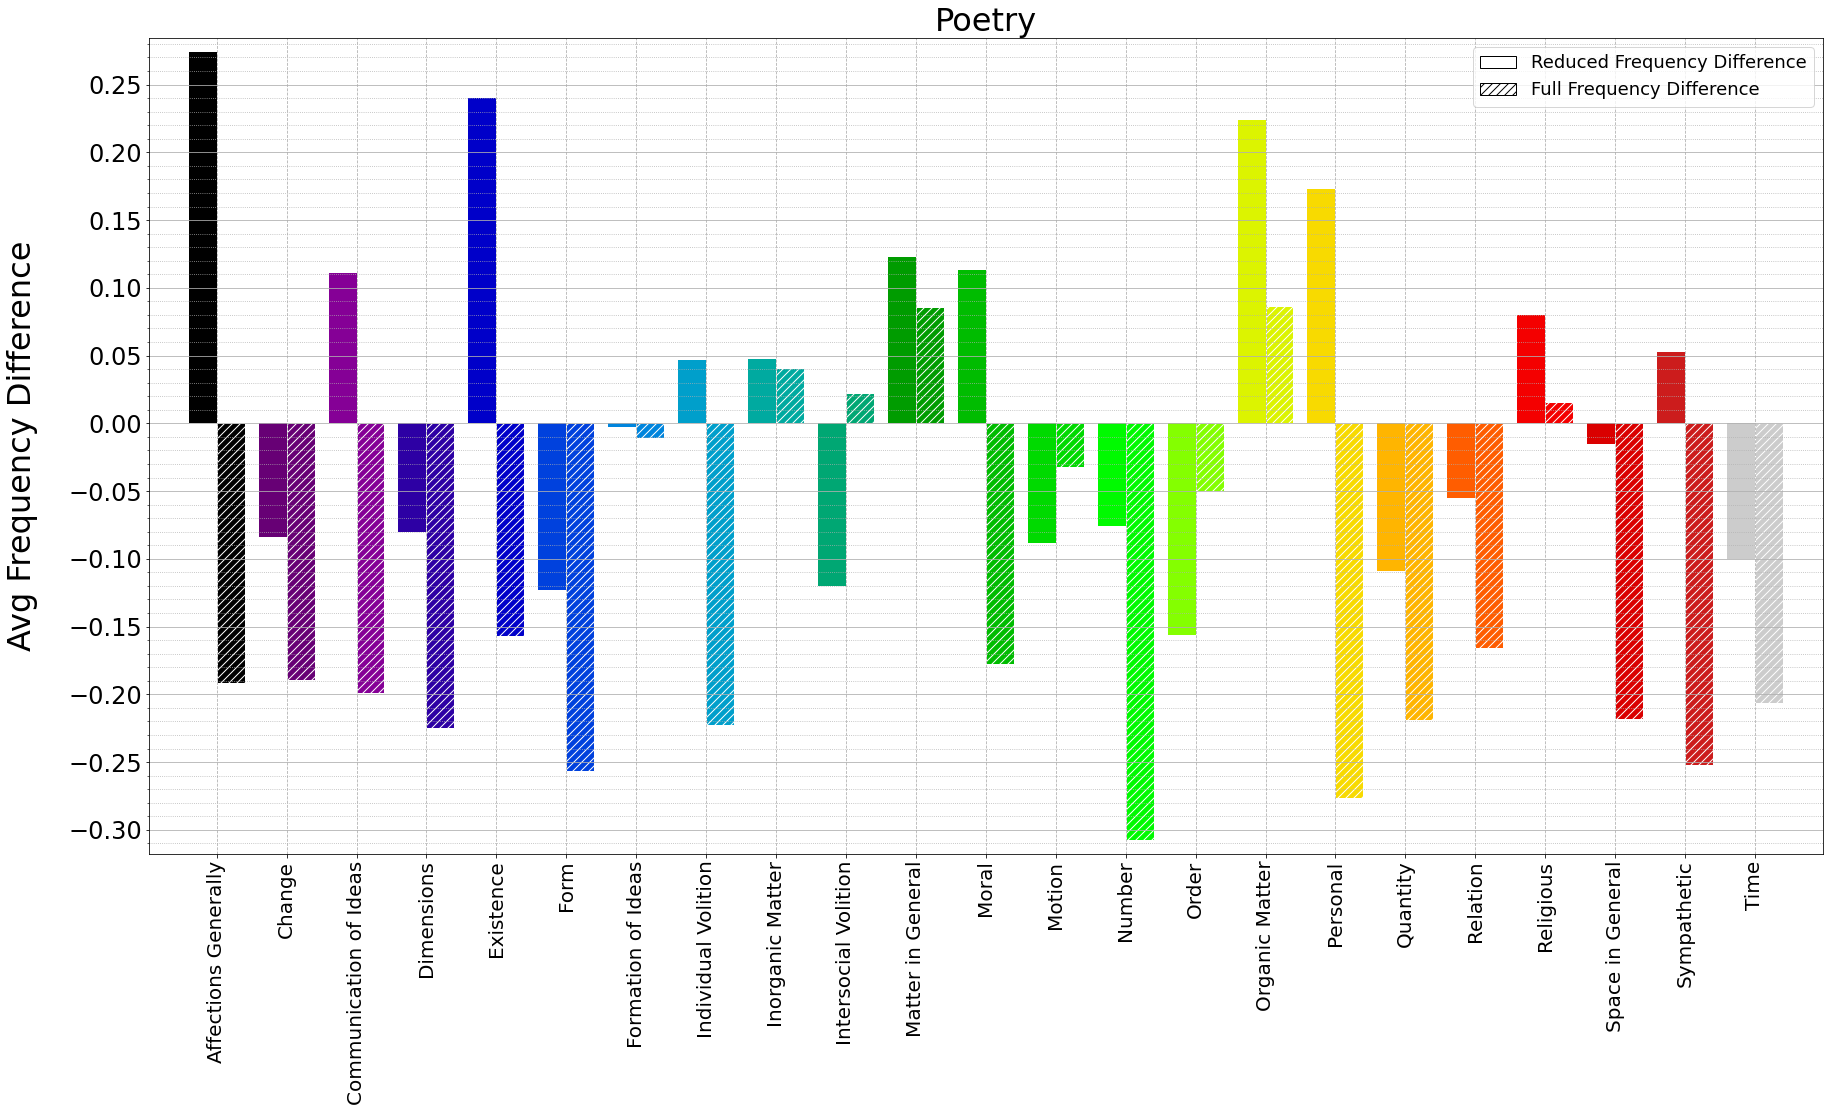

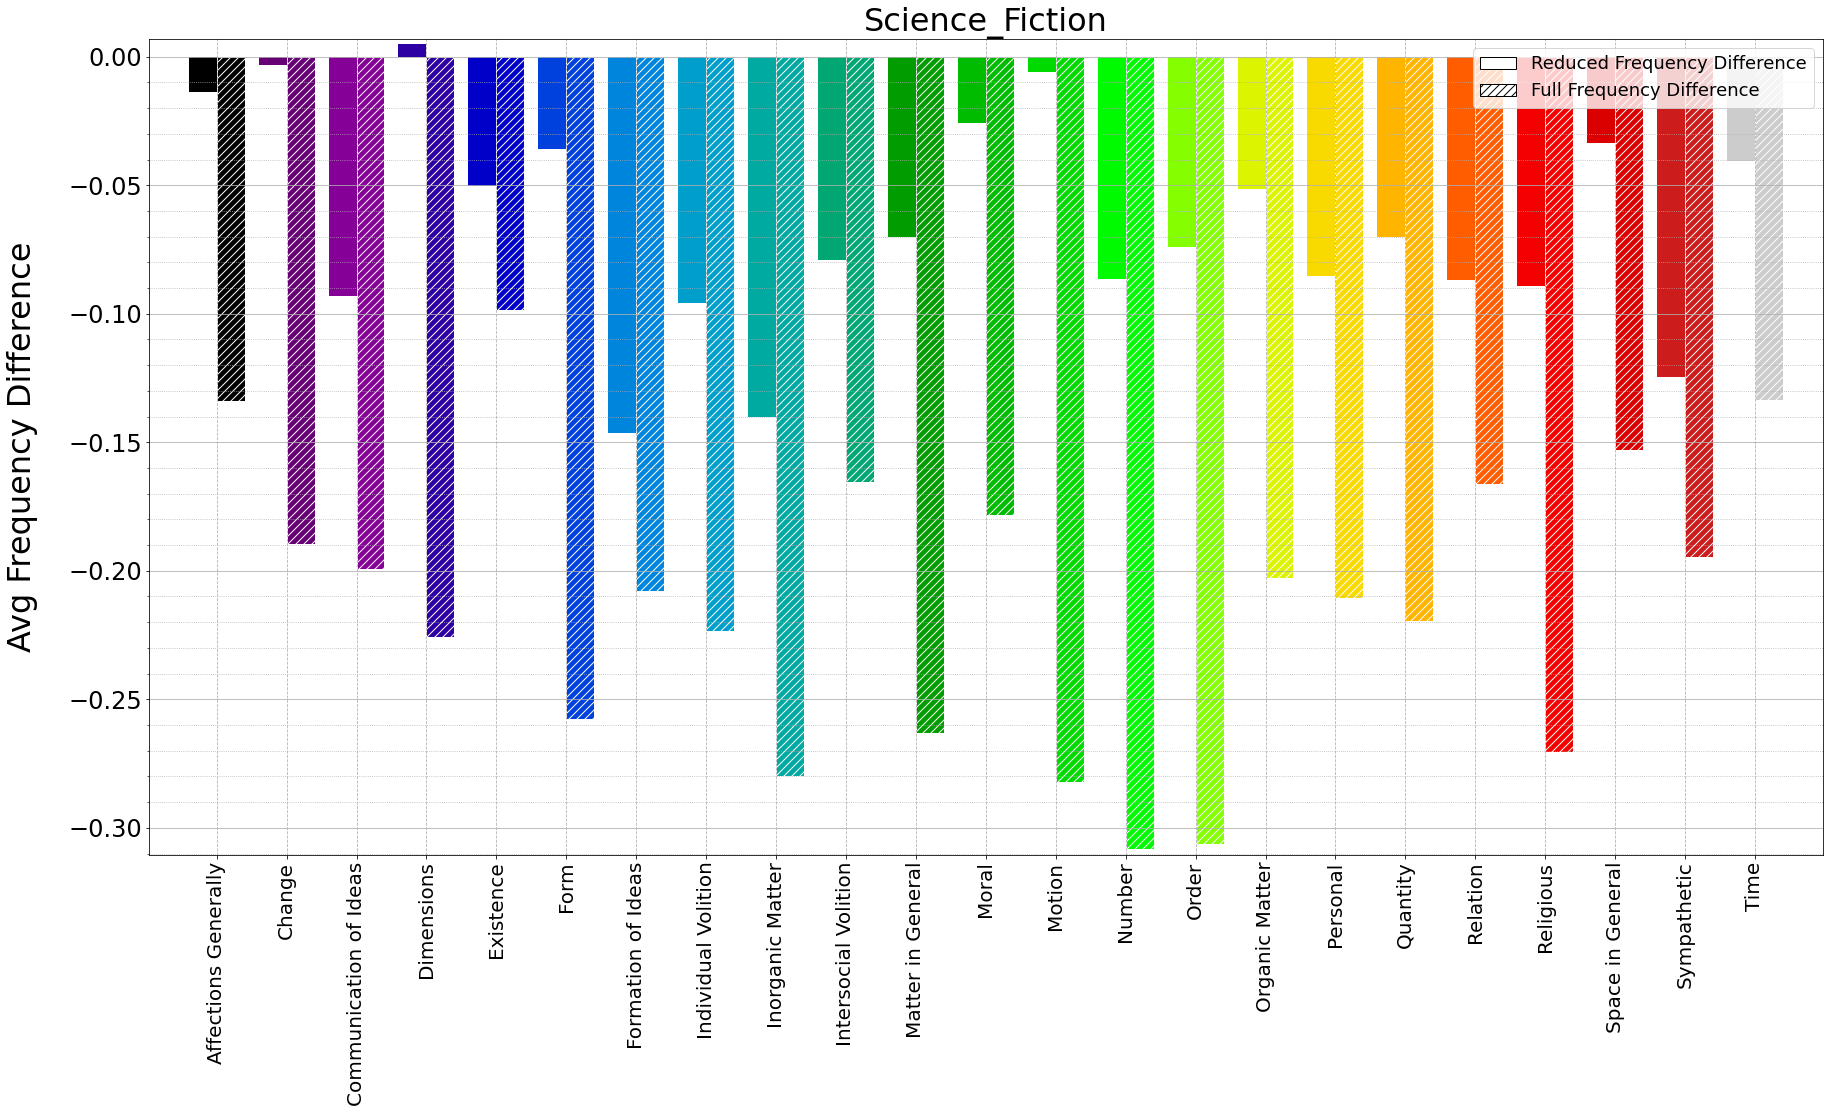

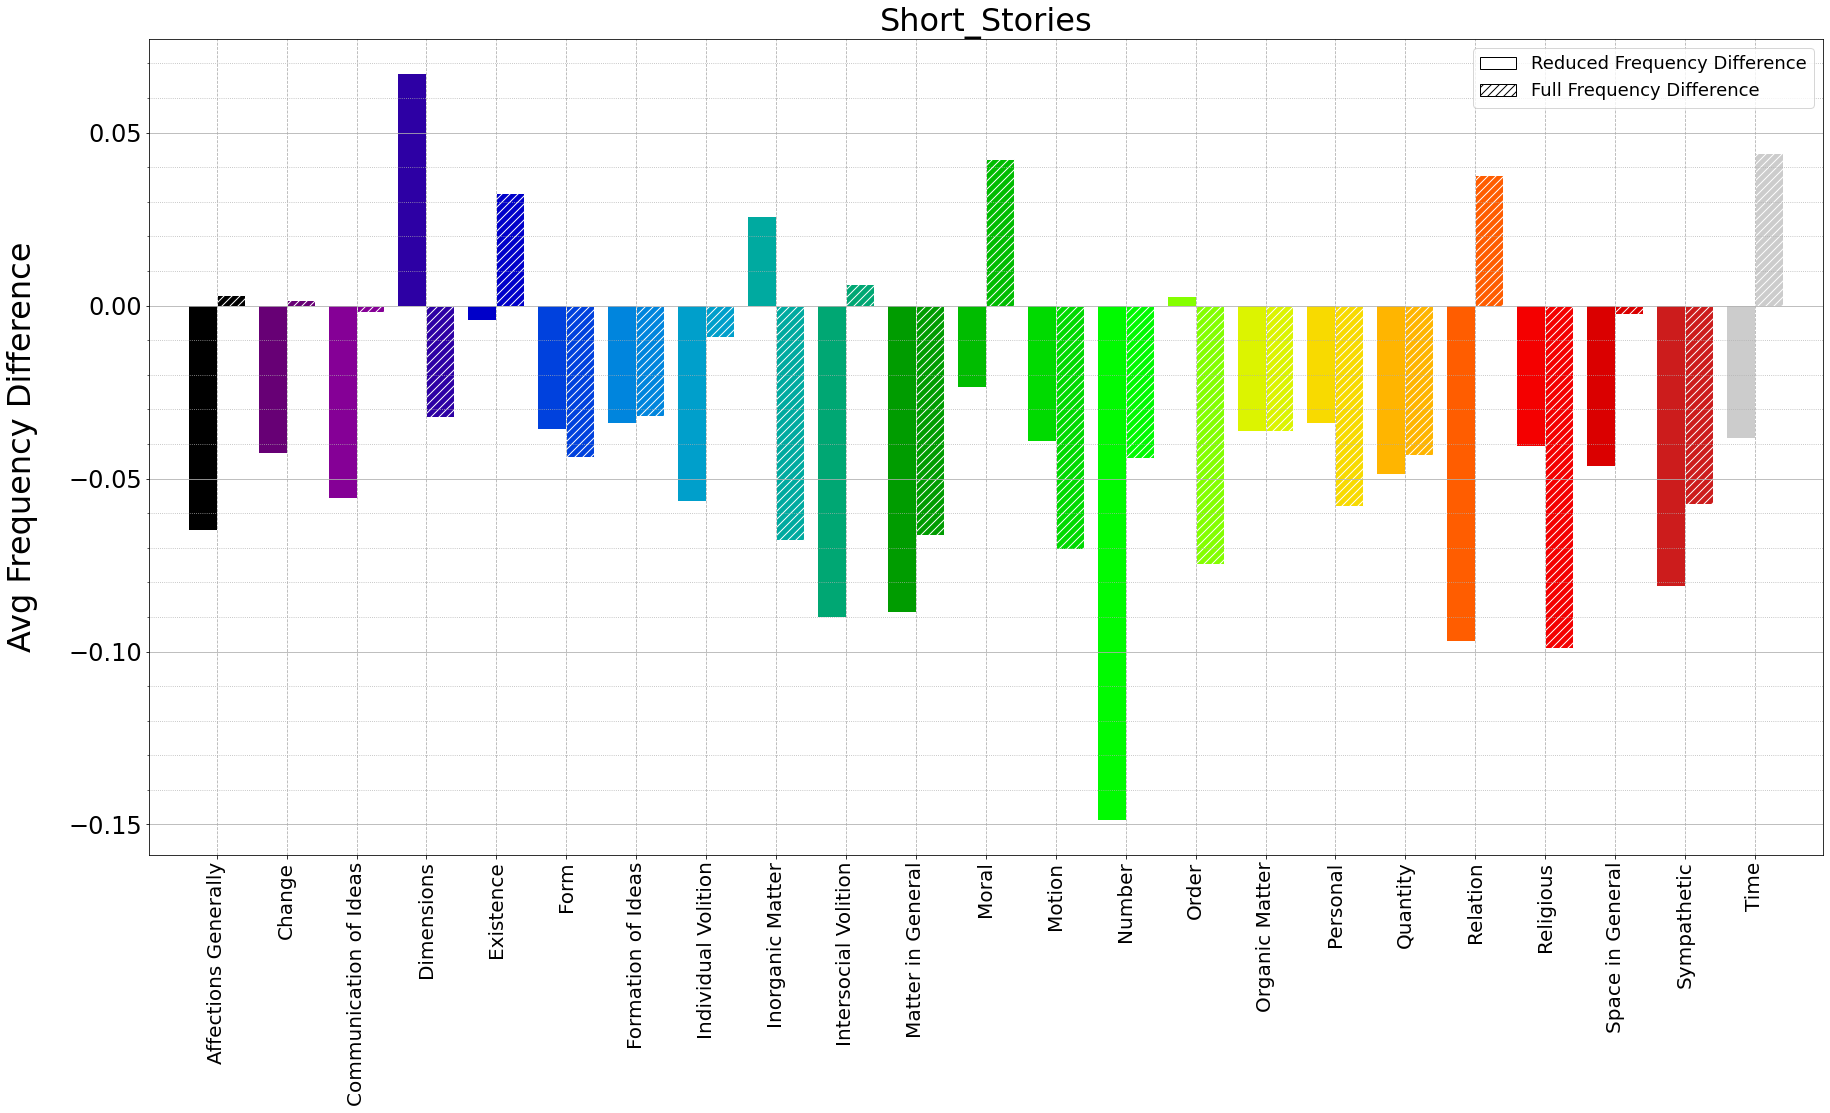

In [40]:
plot_theme_freq_diff(wnrf_rosect_wvg, wn_rosect_wvg_colors, other_wvs=wn_rosect_wvg)

## Average Theme Frequency Difference by Genre, Reduced vs. Non-Reduced

Genre,Average Frequency Difference (Reduced),Average Frequency Difference
Adventure_Stories,0.153032,0.152844
Fiction,0.120217,0.099305
Historical_Fiction,0.140856,0.174524
Love_Stories,0.097888,0.132537
Mystery,0.281668,0.092874
Poetry,0.108412,0.156908
Science_Fiction,0.065551,0.211774
Short_Stories,0.052194,0.039349
Average,0.127477,0.132514


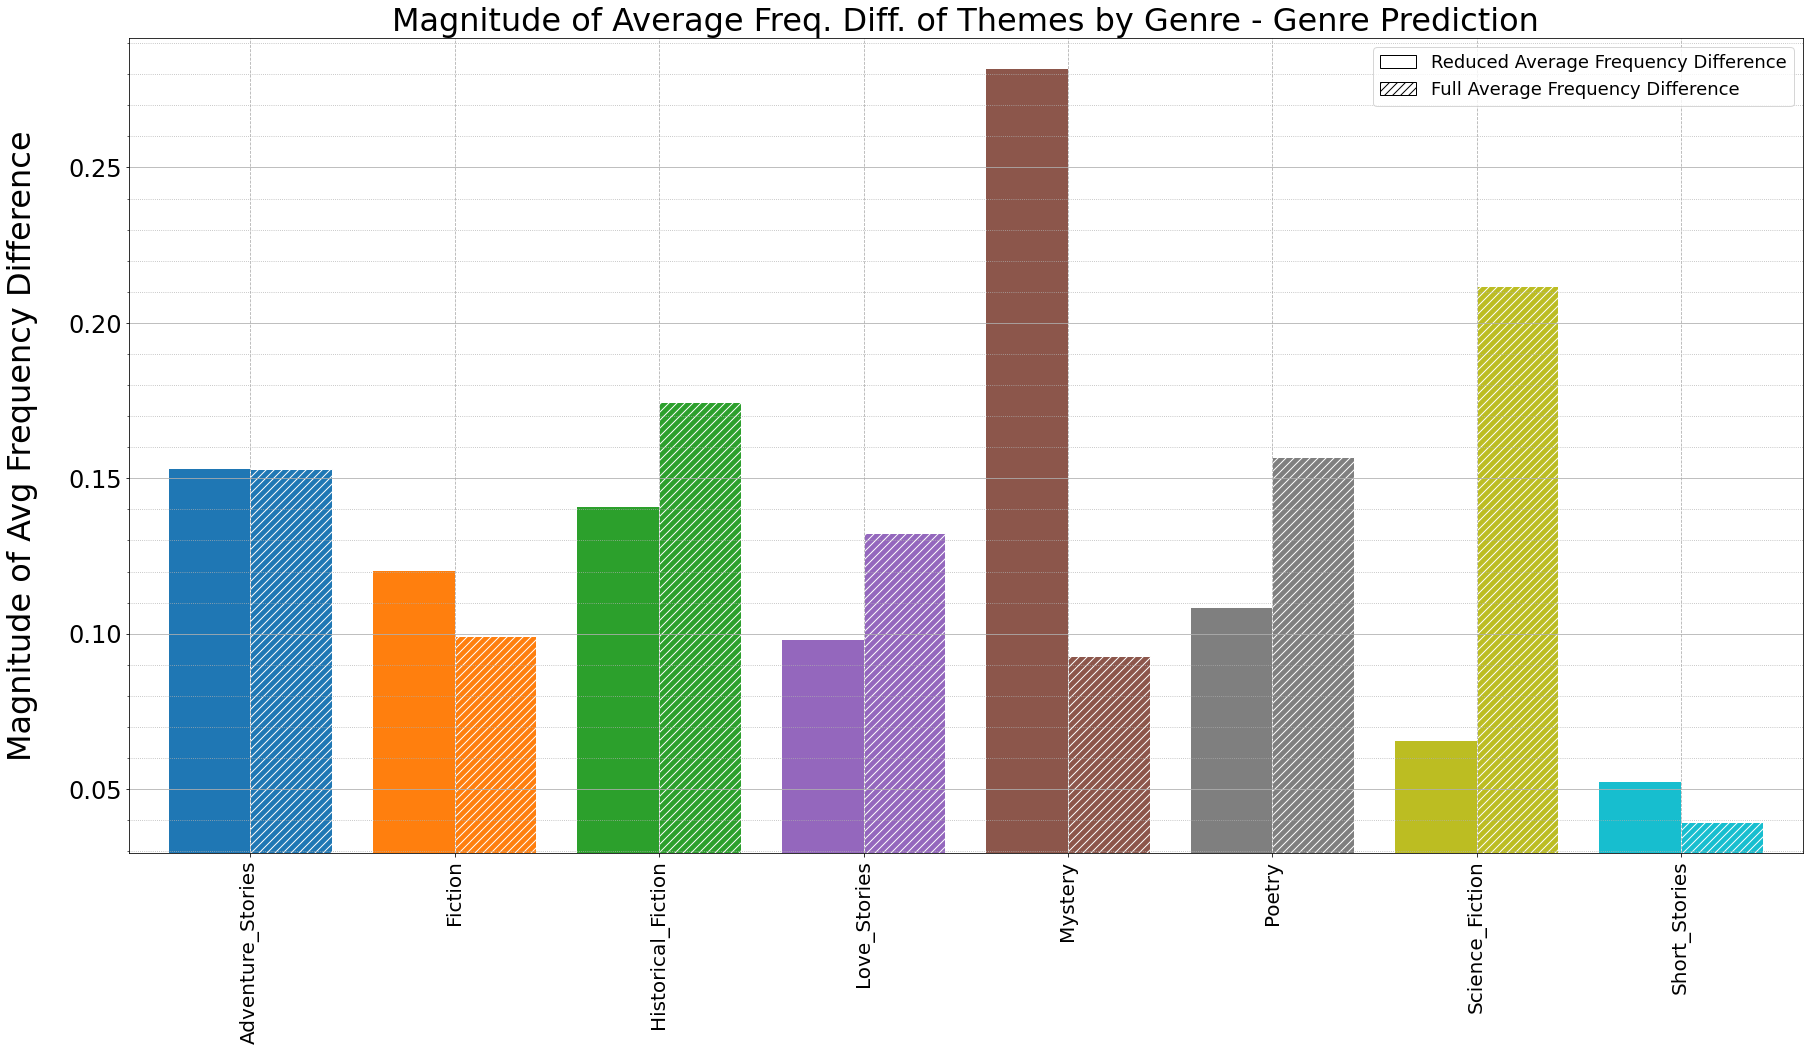

In [41]:
plot_avg_freq_diff_by_genre(wnrf_rosect_wvg, create_cmap(plt.cm.tab10, NEW_GENRES), other_wvs=wn_rosect_wvg,
                            title="Magnitude of Average Freq. Diff. of Themes by Genre - Genre Prediction")